## CNN
1. Load mnist dataset
2. Normalize the dataset
3. Convert and to categorical
4. Create of model
5. Compile the model
6. Model Training
7. Evaluate the model
8. Predict an image


In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

from matplotlib import pyplot as plt
%matplotlib inline

/home/daniel/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load dataset

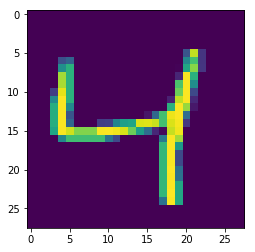

In [2]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()
n_classes = 10

plt.imshow(x_train[2])

### Notmalize Dataset
(0,...,255)   ->   (0f,...,1f)

Before: [ 18  18  18 126 136] 

After: [0.07058824 0.07058824 0.07058824 0.49411765 0.53333333]


Text(0.5,1,'4')

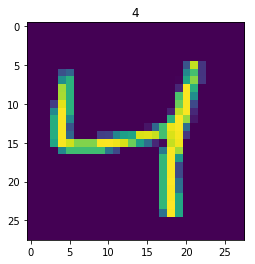

In [3]:
print('Before:',x_train[0][5][13:18],'\n')

x_train = x_train/255
x_test = x_test/255

print('After:',x_train[0][5][13:18])
plt.figure()
plt.imshow(x_train[2])
plt.title(y_train[2])

#### Adding gray color channel
For this model, the format of the input data must be (imgs, 28, 28, channels) and the original form is (imgs, 28, 28).

Mnist images is greys scale, then the number of channels is 1, if the dataset for RGB, it will be 3

In [4]:
print("Train \t{fx} \nTest \t{fy}\n\n".format(fx=x_train.shape,fy=x_test.shape))

x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

print("Train \t{fx} \nTest \t{fy}".format(fx=x_train.shape,fy=x_test.shape))

Train 	(60000, 28, 28) 
Test 	(10000, 28, 28)


Train 	(60000, 28, 28, 1) 
Test 	(10000, 28, 28, 1)


### To Categorical
Before

In [5]:
y_train[0:3]

array([5, 0, 4], dtype=uint8)

After

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

y_train[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Model

In [7]:
inputs = Input(shape=[28,28,1])

x = Conv2D(128,[3,3],strides=[1,1],padding='valid',activation='relu')(inputs)
x = MaxPool2D(pool_size=[2,2],strides = [2,2])(x)

x = Conv2D(128,[3,3],strides=[1,1],padding='valid',activation='relu')(x)
x = MaxPool2D(pool_size=[2,2],strides = [2,2])(x)

x = Flatten()(x)

x = Dense(256,activation='tanh')(x)
x = Dense(256,activation='tanh')(x)
x = Dense(n_classes,activation='softmax')(x)

model = Model(inputs=inputs,outputs=x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               819456    
__________

In [8]:
opt = Adam(lr=0.0001,decay=0.1e-6)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

### Load Weights

In [9]:
try:
    model.load_weights(filepath='weights.hdf5')
    print("Loaded")
except Exception as ex:    
    print(ex)
    print('The weight file does not exist, or the model has changed,'+ 
          'a new file will be created when the training is started')


Unable to open file (unable to open file: name = 'weights.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
The weight file does not exist, or the model has changed,a new file will be created when the training is started


### Train

if filepath is 'weights.{epoch:02d}-{val_loss:.2f}.hdf5', for each epoch, one file will be created

In [10]:
checkpoint = ModelCheckpoint(filepath='weights.hdf5',monitor='val_acc',verbose=1,mode = 'max')

model.fit(x=x_train,y=y_train,batch_size=50,epochs=10,validation_data=(x_test,y_test),callbacks=[checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 391us/step - loss: 0.2367 - acc: 0.9335 - val_loss: 0.0698 - val_acc: 0.9779

Epoch 00001: saving model to weights.hdf5
Epoch 2/10
60000/60000 [==============================] - 22s 364us/step - loss: 0.0660 - acc: 0.9800 - val_loss: 0.0472 - val_acc: 0.9845

Epoch 00002: saving model to weights.hdf5
Epoch 3/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0478 - acc: 0.9854 - val_loss: 0.0392 - val_acc: 0.9872

Epoch 00003: saving model to weights.hdf5
Epoch 4/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0373 - acc: 0.9882 - val_loss: 0.0365 - val_acc: 0.9882

Epoch 00004: saving model to weights.hdf5
Epoch 5/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0302 - acc: 0.9907 - val_loss: 0.0317 - val_acc: 0.9900

Epoch 00005: saving model to weights.hdf5
Epoch 6/10
60000/60000 [================

### Evaluate the model

In [11]:
ev = model.evaluate(x=x_test,y=y_test)
print('loss:\t',ev[0])
print('acc:\t',ev[1])

10000/10000 [==============================] - 1s 149us/step
loss:	 0.02774786069812253
acc:	 0.9911


### Predicting an image

In [12]:
def predict(img):    
    shape = [1,img.shape[0],img.shape[1],1]
    img = img.reshape(shape)
    
    pred = model.predict(img)
        
    num = np.argmax(pred)
    percent = np.max(pred)
    
    return num,percent

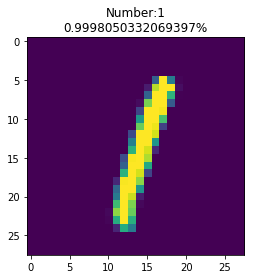

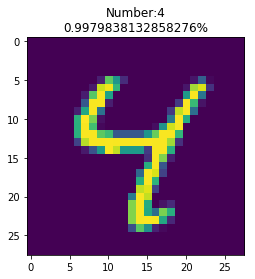

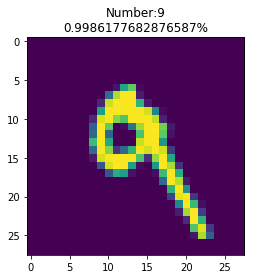

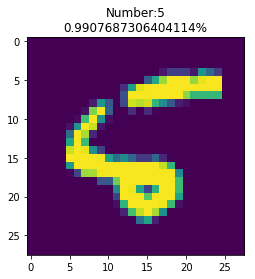

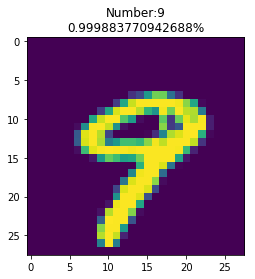

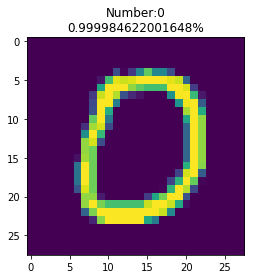

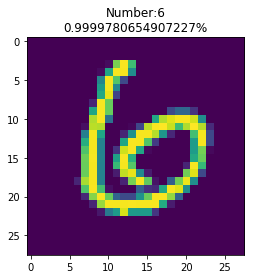

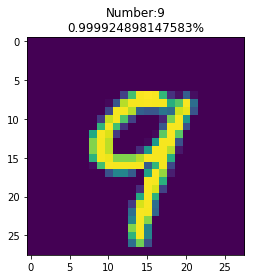

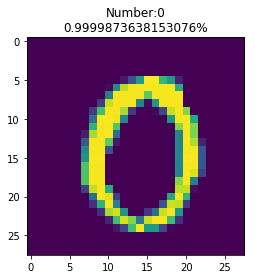

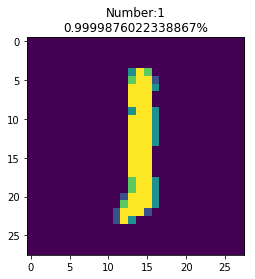

In [17]:
for i in range(5,15):
    img = x_test[i]
    number,percent = predict(img)
    plt.figure()
    plt.title("Number:{n}\n{p}%".format(n=number,p=percent))
    plt.imshow(img.reshape(28,28))

### Other tests

In [20]:
import cv2 as cv

def open_img(path,w=28,h=28):
    img = cv.imread(path)
    if img.shape[2] == 4:
        img = cv.cvtColor(img,cv.COLOR_RGBA2GRAY)
    else:
        img = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img = cv.resize(img,(w,h))
    img = img.astype('float32')/255
    return img

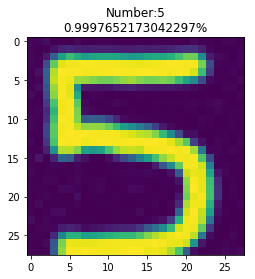

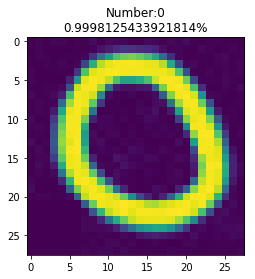

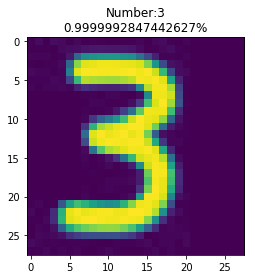

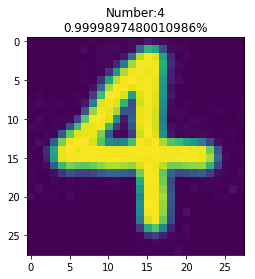

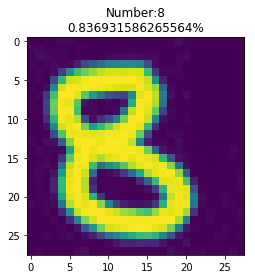

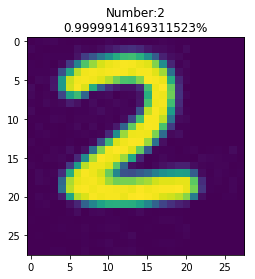

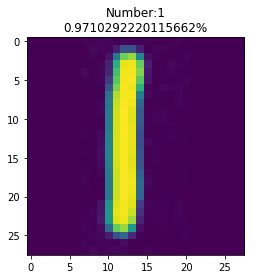

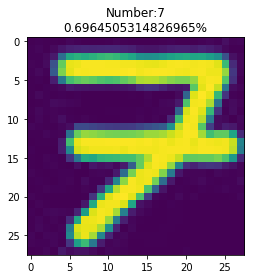

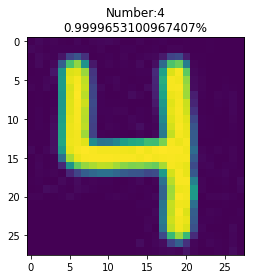

In [22]:
import imghdr,os

PATH = "./IMG_Test/"
for root,_,files in os.walk(PATH):
    for filename in files:
        x = os.path.join(root,filename)
        if os.path.isfile(x) :
            isImg = imghdr.what(x)
            if isImg:
                img = open_img(x)
                number,percent = predict(img)
                plt.figure()
                plt.title("Number:{n}\n{p}%".format(n=number,p=percent))
                plt.imshow(img)
